__Third Assignment__ Borja Ruiz Amantegui, Francesca Sallicati

# 0. SOME PRELIMINARIES 

In [1]:
# Import some libraries
import matplotlib.pyplot as plt 
# For plotting data
import numpy as np              
# For Panda dataframes. A dataframe is a matrix-like structure, 
# similar to R dataframes  
import pandas as pd

import os
os.getcwd()

'C:\\Users\\fra12\\Desktop\\Francesca\\UC3M\\Big Data Intelligence'

The "wind_pickle" file contains data in a binary format called "Pickle". Pickle data loads faster than text data.

In [2]:
data = pd.read_pickle('wind_pickle')

You can visualize the attributes in the dataset. Very important, the output attribute (i.e. the value to be predicted, **energy**, is the first attribute). **Steps** represents the hours in advance of the forecast. We will not use this variable here.

In [3]:
# The dataset contains 5937 instances and 556 attributes (including 
# the outcome to be predicted)
print data.shape
data.columns.values.tolist()



(5937, 556)


['energy',
 'steps',
 'year',
 'month',
 'day',
 'hour',
 'p54.162.1',
 'p54.162.2',
 'p54.162.3',
 'p54.162.4',
 'p54.162.5',
 'p54.162.6',
 'p54.162.7',
 'p54.162.8',
 'p54.162.9',
 'p54.162.10',
 'p54.162.11',
 'p54.162.12',
 'p54.162.13',
 'p54.162.14',
 'p54.162.15',
 'p54.162.16',
 'p54.162.17',
 'p54.162.18',
 'p54.162.19',
 'p54.162.20',
 'p54.162.21',
 'p54.162.22',
 'p54.162.23',
 'p54.162.24',
 'p54.162.25',
 'p55.162.1',
 'p55.162.2',
 'p55.162.3',
 'p55.162.4',
 'p55.162.5',
 'p55.162.6',
 'p55.162.7',
 'p55.162.8',
 'p55.162.9',
 'p55.162.10',
 'p55.162.11',
 'p55.162.12',
 'p55.162.13',
 'p55.162.14',
 'p55.162.15',
 'p55.162.16',
 'p55.162.17',
 'p55.162.18',
 'p55.162.19',
 'p55.162.20',
 'p55.162.21',
 'p55.162.22',
 'p55.162.23',
 'p55.162.24',
 'p55.162.25',
 'cape.1',
 'cape.2',
 'cape.3',
 'cape.4',
 'cape.5',
 'cape.6',
 'cape.7',
 'cape.8',
 'cape.9',
 'cape.10',
 'cape.11',
 'cape.12',
 'cape.13',
 'cape.14',
 'cape.15',
 'cape.16',
 'cape.17',
 'cape.18',
 'ca

In [4]:
data.columns.values.tolist()[1]

'steps'

Below, data is going to be separated in train, validation, and test. Given that the use of Pandas dataframes is quite advanced, I am doing this for you:

In [5]:
indicesTrain = (np.where(data.year<=2006))[0]
print(indicesTrain.shape)
indicesVal = (np.where((data.year==2007) | (data.year==2008)))[0]
print(indicesVal.shape)
indicesTest = (np.where(data.year>=2009))[0]
print(indicesTest.shape)

(2528L,)
(1299L,)
(2110L,)


Beware!, **indicesTrain** does not contain the training data, but the *indices* of the training data. For instance, the following cell means that training data is made of instance number 0, instance number 1, ..., up to instance number 2527. This will be important later.

In [27]:
indicesTrain

(2528L,)


Now, we are going to transform **data**, which is a Pandas dataframe, to **ava**, which is a NumPy matrix. The reason is that Scikit-learn uses NumPy matrices, not Panda dataframes.

In [7]:
ava = data.as_matrix()

Now, **ava** is going to be decomposed into inputs **X** and outputs **y**. And then, into training, validation, and test. For instance, **Xava** and **yava** contain the input attributes, and the output attribute (**energy**) of the whole dataset. Please, ask yourself why the inputs use "6:" and the output use "0". **Xtrain** and **ytrain** are the same, but for the training dataset.

In [8]:
Xava = ava[:,6:]; yava = ava[:,0]
Xtrain = ava[indicesTrain,6:]; ytrain = ava[indicesTrain,0]
Xval = ava[indicesVal,6:]; yval = ava[indicesVal,0]
Xtest = ava[indicesTest,6:]; ytest = ava[indicesTest,0]

The following cell defines function **mae** (Mean Absolute Error), that we will use later to measure the accuracy of models.

In [10]:
def mae(yval_pred, yval):
  val_mae = metrics.mean_absolute_error(yval_pred, yval)
  return(val_mae)

The following cell trains KNN with (Xtrain, ytrain) and evaluates it with (Xval, yval).

In [11]:
from sklearn import metrics
from sklearn import neighbors
n_neighbors = 5
knn = neighbors.KNeighborsRegressor(n_neighbors, weights='uniform')
np.random.seed(0)
%time _ = knn.fit(Xtrain, ytrain)
yval_pred = knn.predict(Xval)

print "MAE for KNN with K=5 is {}".format(mae(yval_pred, yval))

Wall time: 43 ms
MAE for KNN with K=5 is 486.911414935


In [12]:
# In case you need help for KNN
help('sklearn.neighbors.KNeighborsRegressor')

Help on class KNeighborsRegressor in sklearn.neighbors:

sklearn.neighbors.KNeighborsRegressor = class KNeighborsRegressor(sklearn.neighbors.base.NeighborsBase, sklearn.neighbors.base.KNeighborsMixin, sklearn.neighbors.base.SupervisedFloatMixin, sklearn.base.RegressorMixin)
 |  Regression based on k-nearest neighbors.
 |  
 |  The target is predicted by local interpolation of the targets
 |  associated of the nearest neighbors in the training set.
 |  
 |  Read more in the :ref:`User Guide <regression>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, optional (default = 5)
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : str or callable
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of a query po

The following cell, does hyper-parameter tuning for parameter K (n_neighbors), from 1 to 4 by 1. Please, notice that with **partitions = [(indicesTrain, indicesVal)]** we are telling **gridSearch** to use the training dataset for training the different models with the different parameters, and the validation dataset for testing. Notice that this is different to other notebooks, where crossvalidation was used for this purpose. 

In [14]:
from sklearn.grid_search import GridSearchCV
np.random.seed(0)
param_grid = {'n_neighbors': range(1,4,1)}

partitions = [(indicesTrain, indicesVal)]
clf = GridSearchCV(neighbors.KNeighborsRegressor(), 
                   param_grid,
                   scoring='neg_mean_absolute_error',
                   cv=partitions , verbose=1)
%time _ = clf.fit(Xava,yava)

Fitting 1 folds for each of 3 candidates, totalling 3 fits
Wall time: 1.54 s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s finished


Next, we show the best K parameter and the MAE of the final model built with the best parameter.

In [15]:
print "Best K: {} and MAE for best K: {}".format(clf.best_params_, -clf.best_score_)

Best K: {'n_neighbors': 3} and MAE for best K: 503.711691044


# 1. HOW LONG DOES IT TAKE?

It is always a good idea to have some estimation of how long your machine learning algorithm is going to take. In the next two cells, try to estimate how many seconds KNN (with K=3) does it take, with only **100 instances**. With 6000 instances, it will take approximately 60 times that number. You can use **%time** for timing, as in previous cells.

In [16]:
#new data (100 instances)
Xava2 = ava[:100,6:]; yava2 = ava[:100,0]
Xtrain2 = ava[:100,6:]; ytrain2 = ava[:100,0]
Xval2 = ava[:100,6:]; yval2 = ava[:100,0]
Xtest2 = ava[:100,6:]; ytest2 = ava[:100,0]

#regressor
n_neighbors2 = 3
knn2 = neighbors.KNeighborsRegressor(n_neighbors2, weights='uniform')
np.random.seed(0)
%time _ = knn2.fit(Xtrain2, ytrain2)
yval_pred2 = knn2.predict(Xval2)

print "MAE for KNN with K=3 is {}".format(mae(yval_pred2, yval2))

#new data (6000 instances)
Xava3 = ava[:6000,6:]; yava3 = ava[:6000,0]
Xtrain3 = ava[:6000,6:]; ytrain3 = ava[:6000,0]
Xval3 = ava[:6000,6:]; yval3 = ava[:6000,0]
Xtest3 = ava[:6000,6:]; ytest3 = ava[:6000,0]

n_neighbors3 = 3
knn3 = neighbors.KNeighborsRegressor(n_neighbors3, weights='uniform')
np.random.seed(0)
%time _ = knn3.fit(Xtrain3, ytrain3)
yval_pred3 = knn3.predict(Xval3)

print "MAE for KNN with K=3 is {}".format(mae(yval_pred3, yval3))



Wall time: 2 ms
MAE for KNN with K=3 is 367.4187
Wall time: 245 ms
MAE for KNN with K=3 is 349.253959912


Please, do the same for Decision trees with default parameters

In [29]:
from sklearn import tree

#DecisionTreeRegressor for 100 instances
tree1 = tree.DecisionTreeRegressor()
tree1.fit(Xtrain2, ytrain2)
np.random.seed(0)
%time _ = tree1.fit(Xtrain2, ytrain2)
yval_predtree1 = tree1.predict(Xval2)
print "MAE for Tree (100 instances) is {}".format(mae(yval_predtree1, yval2))

#DecisionTreeRegressor for 6000 instances
tree2 = tree.DecisionTreeRegressor()
tree2.fit(Xtrain3, ytrain3)
np.random.seed(0)
%time _ = tree2.fit(Xtrain3, ytrain3)
yval_predtree2 = tree2.predict(Xval3)

print "MAE for Tree (6000 instances) is {}".format(mae(yval_predtree2, yval3))


Wall time: 41 ms
MAE for Tree (100 instances) is 0.0
Wall time: 4.94 s
MAE for Tree (6000 instances) is 0.0


# 2. MODEL SELECTION AND HYPER-PARAMETER TUNING

Train a KNN model with default hiper-parameters

In [18]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor()
knn.fit(Xtrain, ytrain) 

%time _ = knn.fit(Xtrain, ytrain)
yval_predknn = knn.predict(Xval)

print "MAE for KNN with defult hyper-parameters is {}".format(mae(yval_predknn, yval))



Wall time: 65 ms
MAE for KNN with defult hyper-parameters is 486.911414935


Do hyper-parameter tuning for KNN. Can you improve results? Note: if **gridSearch** takes too long, you can use **Randomized Search** instead.

In [19]:
from sklearn.grid_search import GridSearchCV
np.random.seed(0)
param_grid = {'n_neighbors': range(2,34,1)}

knnGS = GridSearchCV(neighbors.KNeighborsRegressor(), 
                   param_grid,
                   scoring='neg_mean_squared_error',
                   cv=5 , n_jobs=1, verbose=1)
%time _ = knnGS.fit(Xtrain,ytrain)

yval_predknnGS = knnGS.predict(Xval)
print "MAE for KNN with K={} is {}".format(knnGS.best_params_,mae(yval_predknnGS, yval))

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:   45.5s finished


Wall time: 45.6 s
MAE for KNN with K={'n_neighbors': 33} is 474.536480276


In [30]:
from sklearn.grid_search import RandomizedSearchCV
np.random.seed(0)
param_grid = {'n_neighbors': range(2,34,1)}

knnRS = RandomizedSearchCV(neighbors.KNeighborsRegressor(), 
                   param_grid,
                   scoring='neg_mean_squared_error',
                   cv=5 , n_jobs=1, verbose=1)
%time _ = knnRS.fit(Xtrain,ytrain)

yval_predknnRS = knnRS.predict(Xval)
print "MAE for KNN with K={} is {}".format(knnRS.best_params_,mae(yval_predknnRS, yval))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   10.9s finished


Wall time: 11.1 s
MAE for KNN with K={'n_neighbors': 30} is 474.437641006


In [ ]:
#slightly better than the previous one

Train a decision tree for regression with default hiper-parameters

In [31]:
from sklearn import tree
import numpy as np
from sklearn import metrics
t = tree.DecisionTreeRegressor()
t.fit(Xtrain, ytrain)

yval_predt = t.predict(Xval)
print "MAE for Tree with default hyper parameters is {}".format(mae(yval_predt, yval))


MAE for Tree with default hyper parameters is 378.398660508


In [21]:
# better than KNN

Do hyper-parameter tuning for Decision trees. Can you improve results?

In [32]:
from sklearn.grid_search import GridSearchCV
np.random.seed(0)
param_grid = {'max_depth': range(2,16,2),
              'min_samples_split': range(2,34,2)}

neightGS = GridSearchCV(tree.DecisionTreeRegressor(), 
                   param_grid,
                   scoring='neg_mean_squared_error',
                   cv=5 , n_jobs=1, verbose=1)
%time _ = neightGS.fit(Xtrain,ytrain)
yval_predtGS = neightGS.predict(Xval)

neightGS.best_params_
print "MAE for Tree using GridSearch is {}".format(mae(yval_predtGS, yval))

Fitting 5 folds for each of 112 candidates, totalling 560 fits


[Parallel(n_jobs=1)]: Done 560 out of 560 | elapsed:  7.2min finished


Wall time: 7min 10s
<bound method GridSearchCV.fit of GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32], 'max_depth': [2, 4, 6, 8, 10, 12, 14]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=1)>
MAE for Tree using GridSearch is 313.327883468


In [35]:
from sklearn.grid_search import RandomizedSearchCV
np.random.seed(0)
param_grid = {'max_depth': range(2,16,2),
              'min_samples_split': range(2,34,2)}

neightRS = RandomizedSearchCV(tree.DecisionTreeRegressor(), 
                   param_grid,
                   scoring='neg_mean_squared_error',
                   cv=5 , n_jobs=1, verbose=1)
%time _ = neightRS.fit(Xtrain,ytrain)

yval_predtRS = neightRS.predict(Xval)
print "MAE for Tree using RandomizedSearch is {}".format(mae(yval_predtRS, yval))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   33.3s finished


Wall time: 34.2 s
MAE for Tree using RandomizedSearch is 317.503935226


In [24]:
#improves from 371 to 317

Train a Random Forest (RF) with default parameters. A RF is an ensemble technique based on Decision Trees, but instead of training just a single decision tree, it trains many of them and then computes the average of the outputs. Please, bear in mind that a RF with default parameters involves training 100 trees. You can estimate by hand how long it is going to take, and if it is excessive, you can lower the number of decision trees in the ensemble. 

In [25]:
help('sklearn.ensemble.RandomForestRegressor')

Help on class RandomForestRegressor in sklearn.ensemble:

sklearn.ensemble.RandomForestRegressor = class RandomForestRegressor(ForestRegressor)
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and use averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is always the same as the original
 |  input sample size but the samples are drawn with replacement if
 |  `bootstrap=True` (default).
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators : integer, optional (default=10)
 |      The number of trees in the forest.
 |  
 |  criterion : string, optional (default="mse")
 |      The function to measure the quality of a split. Supported criteria
 |      are "mse" for the mean squared error, which is equal to variance
 |      reduction as feature selection criterion, and "mae" for

In [36]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(Xtrain, ytrain)

yval_predrf = rf.predict(Xval)
print "MAE for RandomForest with default hyper parameters is {}".format(mae(yval_predrf, yval))


MAE for RandomForest with default hyper parameters is 293.140709007


In [27]:
#better than tree

Do hyper-parameter tuning for Random Forests. Their main hyper-parameter is **n_estimators**, which is the number of decision trees in the ensemble. Check some values around the default value (like, 50, 100, 150, ...). Please, bear in mind this is going to take time ... In case you want to use other hyper-parameters, please ask the teacher.

In [28]:
from sklearn.grid_search import RandomizedSearchCV
from sklearn import ensemble
np.random.seed(0)
param_grid = {'n_estimators': range(1,100)}

rfRS = RandomizedSearchCV(ensemble.RandomForestRegressor(), 
                   param_grid,
                   scoring='neg_mean_squared_error',
                   cv=5 , n_jobs=1, verbose=1)
%time _ = rfRS.fTit(Xtrain,ytrain)

yval_predrfRS = rfRS.predict(Xval)
print "MAE for RandomForest with n_estimators (number of trees in the forest) {} using RandomizedSearch is {}".format(rfRS.best_params_,mae(yval_predrfRS, yval))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 36.4min finished


Wall time: 37min 16s
<bound method RandomizedSearchCV.fit of RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99

In [40]:
from sklearn.grid_search import RandomizedSearchCV
from sklearn import ensemble
np.random.seed(0)
param_grid = {'n_estimators': range(1,200,20)}

rfRS2 = RandomizedSearchCV(ensemble.RandomForestRegressor(), 
                   param_grid,
                   scoring='neg_mean_squared_error',
                   cv=5 , n_jobs=1, verbose=1)
%time _ = rfRS2.fit(Xtrain,ytrain)

yval_predrfRS2 = rfRS2.predict(Xval)
print "MAE for RandomForest with n_estimators (number of trees in the forest) {} using RandomizedSearch is {}".format(rfRS2.best_params_,mae(yval_predrfRS2, yval))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 60.7min finished


Wall time: 1h 3min 41s
MAE for RandomForest with n_estimators (number of trees in the forest) {'n_estimators': 161} using RandomizedSearch is 278.080563501


In [ ]:
#since the value doesn't really change, we choose to stick to the previous model since it's less complex

Train a Gradient Tree Boosting (GB) with default parameters. A GB is also an ensemble technique based on Decision Trees. In this case, the second decision tree tries to fix the mistakes of the first decision tree. The third decision tree tries to fix the mistakes of the first two decision trees. An so on.

Please, bear in mind that a GB with default parameters involves training 100 trees. You can estimate by hand how long it is going to take, and if it is excessive, you can lower the number of decision trees in the ensemble. 

In [30]:
help('sklearn.ensemble.GradientBoostingRegressor')

Help on class GradientBoostingRegressor in sklearn.ensemble:

sklearn.ensemble.GradientBoostingRegressor = class GradientBoostingRegressor(BaseGradientBoosting, sklearn.base.RegressorMixin)
 |  Gradient Boosting for regression.
 |  
 |  GB builds an additive model in a forward stage-wise fashion;
 |  it allows for the optimization of arbitrary differentiable loss functions.
 |  In each stage a regression tree is fit on the negative gradient of the
 |  given loss function.
 |  
 |  Read more in the :ref:`User Guide <gradient_boosting>`.
 |  
 |  Parameters
 |  ----------
 |  loss : {'ls', 'lad', 'huber', 'quantile'}, optional (default='ls')
 |      loss function to be optimized. 'ls' refers to least squares
 |      regression. 'lad' (least absolute deviation) is a highly robust
 |      loss function solely based on order information of the input
 |      variables. 'huber' is a combination of the two. 'quantile'
 |      allows quantile regression (use `alpha` to specify the quantile).
 |

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(Xtrain, ytrain)

yval_predgb = gb.predict(Xval)
print "MAE for GradientBoosting with default hyper parameters is {}".format(mae(yval_predgb, yval))

MAE for GradientBoosting with default hyper parameters is 280.211847132


In [32]:
#slightly worse than random forest

Do hyper-parameter tuning for Gradient Boosting. Their main hyper-parameter is **n_estimators**, which is the number of decision trees in the ensemble. Check some values around the default value (like, 50, 100, 150, ...). Please, bear in mind this is going to take time ... In case you want to use other hyper-parameters, please ask the teacher.

In [33]:
from sklearn.grid_search import RandomizedSearchCV
from sklearn import ensemble
np.random.seed(0)
param_grid = {'n_estimators': range(1,100)}

gbRS = RandomizedSearchCV(ensemble.GradientBoostingRegressor(), 
                   param_grid,
                   scoring='neg_mean_squared_error',
                   cv=5 , n_jobs=1, verbose=1)
%time _ = gbRS.fit(Xtrain,ytrain)

yval_predgbRS = gbRS.predict(Xval)
print "MAE for GradientBoosting with n_estimators (number of trees in the forest) {} using RandomizedSearch is {}".format(gbRS.best_params_,mae(yval_predgbRS, yval))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.0min finished


Wall time: 5min 9s
<bound method RandomizedSearchCV.fit of RandomizedSearchCV(cv=5, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 

In [45]:
from sklearn.grid_search import RandomizedSearchCV
from sklearn import ensemble
np.random.seed(0)
param_grid = {'n_estimators': range(1,200,20)}

gbRS2 = RandomizedSearchCV(ensemble.GradientBoostingRegressor(), 
                   param_grid,
                   scoring='neg_mean_squared_error',
                   cv=5 , n_jobs=1, verbose=1)
%time _ = gbRS2.fit(Xtrain,ytrain)

yval_predgbRS2 = gbRS2.predict(Xval)
print "MAE for GradientBoosting with n_estimators (number of trees in the forest) {} using RandomizedSearch is {}".format(gbRS2.best_params_,mae(yval_predgbRS2, yval))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  8.3min finished


Wall time: 8min 23s
MAE for GradientBoosting with n_estimators (number of trees in the forest) {'n_estimators': 61} using RandomizedSearch is 279.621406567


In [ ]:
#Random Forest performs better than Gradient Boosting, even though the difference is very little

At this point, you should know which model performs best, and what hyper-parameters to use. Please, evaluate that best performing model on the test set.

In [34]:
#The winning model is RandomForest with 55 trees 
yval_predrfRS = rfRS.predict(Xtest)
print "MAE for RandomForest with n_estimators (number of trees in the forest) {} using RandomizedSearch is {}".format(rfRS.best_params_,mae(yval_predrfRS, ytest))

MAE for RandomForest with n_estimators (number of trees in the forest) {'n_estimators': 55} using RandomizedSearch is 286.974804136


In [ ]:
#the error is slightly increasingon the test set, but not in a significant way (previous value was 278.317294)

# 3. ATTRIBUTE SELECTION

You have to answer the following questions: 

- Are all 550 input attributes actually necessary in order to get a good model? Is it possible to have an accurate model that uses fewer than 550 variables? How many? 
- Is it enough to use only the attributes for the actual Sotavento location? (13th location in the grid)

In order to answer these questions, you should consider the following:

1) Go through the "Attribute Selection" ipython notebook, and understand the main ideas about **SelectKBest** and **Pipeline**.

2) Use **SelectKBest** and **Pipeline** (and whatever else you need) in order to find a subset of attributes that allows to build an accurate Decision Tree model. We are going to use here Decision Trees because they are faster (even if Random Forests or Gradient Boosting performed better in previous sections). Please, note that you cannot just copy/paste from the "Attribute Selection" notebook. You will have to think about how to use the main ideas from that notebook, and change whatever needs changing. 

3) Use the test dataset in order to compare between different models.

(75, -753.53688132167588)
(76, -749.21346421993064)
(80, -748.6797017431162)
(85, -744.68734135065006)
(81, -744.20529412531153)
(77, -743.96210333581507)
(90, -741.34600458316152)
(86, -740.07992904757566)
(82, -738.78450270272265)
(78, -737.7686470702447)
(91, -736.63409172556464)
(87, -734.52984054435512)
(95, -734.14633693685619)
(83, -732.44041951536553)
(92, -730.98718014162387)
(79, -730.66391484725671)
(96, -729.45741826441508)
(88, -728.06169297204133)
(84, -725.17299793595714)
(93, -724.41427914390317)
(97, -723.84055863491824)
(89, -720.67749767302939)
(98, -717.31231235999337)
(94, -716.93257578654323)
(99, -709.88809312274475)
(419, -323.84153823556153)
(414, -323.46270103513757)
(409, -322.96563672470188)
(404, -322.27387127344815)
(424, -318.86423433762695)
(418, -306.59127915421993)
(413, -306.20574065839429)
(408, -305.69469387565596)
(403, -304.99169188286589)
(423, -302.26359167875682)
(417, -289.38865342612735)
(412, -288.99519640339025)
(407, -288.48385899860318)
(

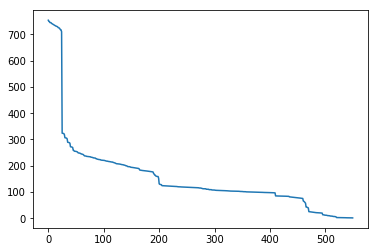

In [35]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, chi2, f_classif, f_regression

#########SELECTKBEST################

%matplotlib inline  
selector = SelectKBest(f_regression, k="all")
selector.fit(Xtrain, ytrain)
sorted_attributes = np.argsort(-selector.scores_)
sorted_scores = np.sort(-selector.scores_)
for index,element in enumerate(zip(sorted_attributes, sorted_scores)):
    print element
    if index>550: break
        
plt.plot(-sorted_scores)
plt.show()

In [36]:
sorted_attributes

array([ 75,  76,  80,  85,  81,  77,  90,  86,  82,  78,  91,  87,  95,
        83,  92,  79,  96,  88,  84,  93,  97,  89,  98,  94,  99, 419,
       414, 409, 404, 424, 418, 413, 408, 403, 423, 417, 412, 407, 402,
       422, 416, 411, 406, 401, 421, 199, 194, 415, 189, 410, 405, 400,
       420, 184, 379, 384, 389, 394, 179, 495, 399, 198, 193, 496, 188,
       299, 497, 183, 294, 549, 544, 378, 289, 383, 388, 393, 539, 178,
       284, 534, 398, 197, 498, 529, 192, 279, 187, 298, 293, 548, 543,
       470, 182, 288, 538, 377, 533, 382, 283, 387, 392, 499, 177, 528,
       196, 278, 397, 450, 191, 455, 297, 460, 465, 547, 186, 292, 542,
       537, 287, 181, 532, 282, 527, 376, 176, 381, 277, 386, 391, 195,
       296, 546, 190, 541, 396, 291, 536, 185, 286, 531, 281, 180, 526,
       276, 471, 545, 175, 295, 540, 375, 290, 535, 380, 385, 390, 285,
       530, 451, 395, 456, 280, 461, 525, 466, 275,   0,   1,   2,   3,
         5,   4,   6,   7,  10,   8,  11,   9,  12,  15,  13,  1

In [37]:
#new sorted data
XtrainNew = Xtrain[:, sorted_attributes]
XtestNew = Xtest[:, sorted_attributes]


In [38]:
#Original Regression Tree
t1 = tree.DecisionTreeRegressor(random_state=0)
t1 = t1.fit(XtrainNew, ytrain)
ytestPred = t1.predict(XtestNew)
print "MAE for Tree with all attributes is {}".format(mae(ytestPred, ytest))

MAE for Tree with all attributes is 384.809654028


In [39]:
#Regression Tree with 400 attributes
t2 = tree.DecisionTreeRegressor(random_state=0)
t2 = t2.fit(XtrainNew[:,:400], ytrain)
ytestPred2 = t2.predict(XtestNew[:,:400])
print "MAE for Tree with 400 attributes is {}".format(mae(ytestPred2, ytest))

MAE for Tree with 400 attributes is 388.124018957


In [40]:
##Regression Tree with 200 attributes
t3 = tree.DecisionTreeRegressor(random_state=0)
t3 = t2.fit(XtrainNew[:,:200], ytrain)
ytestPred3 = t3.predict(XtestNew[:,:200])
print "MAE for Tree with 200 attributes is {}".format(mae(ytestPred3, ytest))

MAE for Tree with 200 attributes is 400.66792891


In [41]:
#Regression Tree with 70 attributes
t4 = tree.DecisionTreeRegressor(random_state=0)
t4 = t4.fit(XtrainNew[:,:70], ytrain)
ytestPred4 = t4.predict(XtestNew[:,:70])
print "MAE for Tree with 70 attributes is {}".format(mae(ytestPred4, ytest))


MAE for Tree with 70 attributes is 390.07336019


In [42]:
#We can see that by selecting the number of attribute with SelectKBest the error is not increasing in a significative way: 
#it grows from the value of 383.927113744 with the 550 attributes to 390.07336019 with only 70 of them. Approximately the same 
#value (388.124018957) is reached with 400 attributes (but is selecting less), while with 200 attributes the error is even higher going up to 
#400.66792891.

In [43]:
###########PIPELINE##########
from sklearn.pipeline import Pipeline

param_grid = {'feature_selection__k': np.arange(Xtrain.shape[1])+1}

treepipe = Pipeline([
  ('feature_selection', SelectKBest(f_regression)),
  ('regression', tree.DecisionTreeRegressor(random_state=0))
])

np.random.seed(0)
treepipe_grid = GridSearchCV(treepipe, 
                        param_grid,
                        scoring='neg_mean_squared_error',
                        cv=5 , n_jobs=1, verbose=1)
%time _ = treepipe_grid.fit(Xtrain,ytrain)

Fitting 5 folds for each of 550 candidates, totalling 2750 fits


[Parallel(n_jobs=1)]: Done 2750 out of 2750 | elapsed: 30.6min finished


Wall time: 30min 38s


In [46]:
ytestPredPipe = treepipe_grid.predict(Xval)
print "MAE for Tree found with Pipeline is {} and the selected attributes are {}".format(mae(ytestPredPipe, yval),treepipe_grid.best_params_)

MAE for Tree found with Pipeline is 372.161416474 and the selected attributes are {'feature_selection__k': 521}


In [47]:
#MAE is close to the previous, however the number of preditors haven't decrease that much (from 550 to 521). Maybe by adding
#other parameters such as 'regression__min_samples_split' the algorithm will sift through the attributes in a deeper way, but 
#fitting so many folds to each of the candidates really took too long.

In [68]:
#FOCUSING ON SOTAVENTO

Xava = ava[:,6:]; yava = ava[:,0]
Xtrain = ava[indicesTrain,6:]; ytrain = ava[indicesTrain,0]
Xval = ava[indicesVal,6:]; yval = ava[indicesVal,0]
Xtest = ava[indicesTest,6:]; ytest = ava[indicesTest,0]

import numpy
XtrainSot=numpy.zeros(shape=(2528,22))
for i in range (0,21):
    XtrainSot[:,i]=ava[indicesTrain,(i*25)+18]

print(XtrainSot.shape)

XvalSot=numpy.zeros(shape=(1299,22))
for i in range (0,21):
    XvalSot[:,i]=ava[indicesVal,(i*25)+18]

print(XvalSot.shape)

XtestSot=numpy.zeros(shape=(2110,22))
for i in range (0,21):
    XtestSot[:,i]=ava[indicesTest,(i*25)+18]

print(XtestSot.shape)

(2528L, 22L)
(1299L, 22L)
(2110L, 22L)


In [66]:
from sklearn.ensemble import RandomForestRegressor
rfSot = RandomForestRegressor(n_estimators=55)
rfSot.fit(XtrainSot, ytrain)

yval_predrfSot = rfSot.predict(XvalSot)
print "MAE for RandomForest with default hyper parameters is {}".format(mae(yval_predrfSot, yval))


MAE for RandomForest with default hyper parameters is 283.218431521


In [67]:
from sklearn.ensemble import RandomForestRegressor
rfSot = RandomForestRegressor(n_estimators=55)
rfSot.fit(XtrainSot, ytrain)

yval_predrfSot2 = rfSot.predict(XtestSot)
print "MAE for RandomForest with default hyper parameters is {}".format(mae(yval_predrfSot2, ytest))


MAE for RandomForest with default hyper parameters is 293.898268763


In [ ]:
#both errors on the validation and test sets results to be a little bit higher than the ones with all 550 attributes, but the
#performance with the subset of attributes of Sotavento is basically the same as the previous.